In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def cost(x, y, theta):
    m = x.shape[0]
    return (-1/m) * np.sum(y.T * np.log(sigmoid(x * theta.T)) + (1-y.T) * np.log(1 - sigmoid(x * theta.T)))

def trainning(x, y, epoch, alpha):
    _theta = [1, 1, 1]
    _train = 0
    _cost = []
    m = x.shape[0]
    while(_train<epoch):
        for i in range(len(_theta)):
            _theta[i] -= (alpha / m) * np.sum(((sigmoid(x * np.matrix(_theta).T) - y)).T * x[:,i])
            _cost.append(cost(x, y, np.matrix(_theta)))
        _train += 1

    return {'theta': _theta, 'cost': _cost}

# 1. OR FUNCTION


### Create sample Data.

* X have values in arange from 0 to 1
* Y have values in arange from 0 to 1

| X1   | X2   |Value |
|------|------|------|
|True  | True |True  |
|True  | False|True  |
|False | True |True  |
|False | False|False |

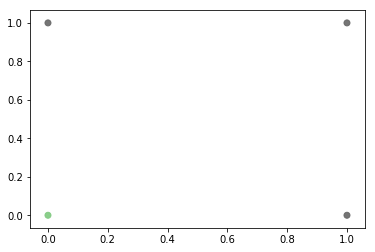

In [3]:
X = np.array([1 ,1 ,1, 1, 0, 1, 0, 1, 1, 0, 0, 1]).reshape(4,3)
Y = np.matrix([1, 1, 1, 0]).T

plt.scatter(X.T[0].tolist(), X.T[1].tolist(), c=Y.T.tolist()[0], cmap=plt.cm.Accent, alpha=0.9)

#Y = Y_1.T

In [4]:
resuilt = trainning(np.matrix(X), Y, epoch= 15000, alpha= 0.01)

In [5]:
theta = resuilt['theta']

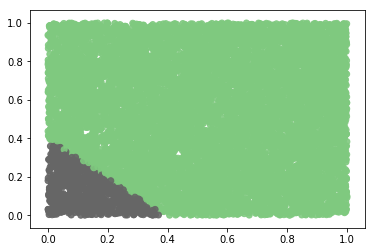

In [6]:
x1 = [random.uniform(0, 1) for i in range(10000)]
x2 = [random.uniform(0, 1) for i in range(10000)]
x3 = [1] * 10000

x = np.concatenate((x1, x2, x3), axis = 0).reshape(3, 10000).T
y = sigmoid(np.matrix(x) * np.matrix(theta).T)
y = [int(i<= 0.5) for i in y]
plt.scatter(x[:,0].tolist(), x[:,1].tolist(), c=y, cmap=plt.cm.Accent, alpha=0.9)

In [7]:
theta

[4.856917844321835, 4.8569055523479285, -1.9198136656420308]

<img src="image\1.png">

## 2. XOR FUNCTION

### Create sample Data

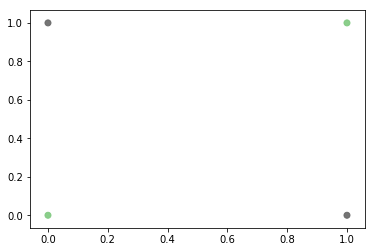

In [8]:
X = np.array([1 ,1 ,1, 1, 0, 1, 0, 1, 1, 0, 0, 1]).reshape(4,3)
Y = np.matrix([0, 1, 1, 0]).T

plt.scatter(X.T[0].tolist(), X.T[1].tolist(), c=Y.T.tolist()[0], cmap=plt.cm.Accent, alpha=0.9)

In [9]:
h = np.matrix([1.35, 1.27, 1.8])
w = np.array([0.2, 0.3, 0.5, 0.3, 0.5, 0.7, 0.6, 0.4, 0.8]).reshape(3,3)

____

# TEST REGION

<img src="image\2_Neural Model.png">

### RELU FUNCTION

In [2]:
def relu(h):
    _h = [max(0, i) for i in h.tolist()[0]]
    return np.matrix(_h)

def sigmoid(z):
    _sig = np.matrix([(1/(1 + np.exp(-i))) for i in z.tolist()[0]])
    return _sig

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.matrix((e_x / e_x.sum()).tolist()[0])

## SAMPLE DATA

### Weight 

In [3]:
W_ij = [0.1, 0.2, 0.3, 0.3, 0.2, 0.7, 0.4, 0.3, 0.9]
W_jk = [0.2, 0.3, 0.5, 0.3, 0.5, 0.7, 0.6, 0.4, 0.8]
W_kl = [0.1, 0.4, 0.8, 0.3, 0.7, 0.2, 0.5, 0.2, 0.9]

In [4]:
W = np.concatenate((W_ij, W_jk, W_kl), axis = 0).reshape(3,3,3)

In [5]:
W

array([[[0.1, 0.2, 0.3],
        [0.3, 0.2, 0.7],
        [0.4, 0.3, 0.9]],

       [[0.2, 0.3, 0.5],
        [0.3, 0.5, 0.7],
        [0.6, 0.4, 0.8]],

       [[0.1, 0.4, 0.8],
        [0.3, 0.7, 0.2],
        [0.5, 0.2, 0.9]]])

### Input and Output

In [6]:
I = np.matrix([0.1, 0.2, 0.7])
Y = np.array([1, 0, 0])

In [7]:
I

matrix([[0.1, 0.2, 0.7]])

### Bias

In [8]:
b_j1 = np.matrix([1,1,1])
b_j2 = np.matrix([1,1,1])
b_j3 = np.matrix([1,1,1])

B = np.concatenate((b_j1, b_j2, b_j3), axis = 0)

## LAYER 1

<img src="image\2_Layer1.png">

In [9]:
H1_IN = I * W[0] + B[0]

# Input H1 into Relu function
H1_OUT = relu(H1_IN)

## LAYER 2

<img src="image\2_Layer2.png">

In [10]:
H2_IN = H1_OUT * W[1] + B[1]

# Dua gia tri H2 vao Sigmoid function
H2_OUT = sigmoid(H2_IN)

H2_OUT

matrix([[0.93883129, 0.94047563, 0.9820843 ]])

## LAYER 3

<img src="image\2_layer3.png">

In [12]:
O_IN = H2_OUT * W[2] + B[2]

O_OUT = softmax(O_IN)
O_OUT

matrix([[0.19844689, 0.28535553, 0.51619758]])

## COST - FUNCTION CROSS ENTROPY

<img src="image\3_CrossEntropy.png">

Cross Entropy được tính cho Cost Function của hàm SoftMax tại Layer 3

In [15]:
# CrossEntropy, KH : E (Error) 
E = (-1/3) * np.sum(Y * np.log(O_OUT).T + (1 - Y) * np.log(1 - O_OUT).T)
E

0.893094174809997

____

## I. BackPropagating Layer 2

### Đạo hàm của Softmax Function 

<img src="image\2_Gradient_Entropy.png">


### Step 1. Tính đạo hàm E (GRADIENT OF SOFTMAX FUNCTION)

In [16]:
O_out0, O_out1, O_out2 = O_OUT.tolist()[0]

# Gradien cua O[0]
Gradient_O_out0 = -1 * ((Y[0] * (1/O_out0)) + (1 - Y[0]) * ( 1 /(1 - O_out0)))
Gradient_O_out1 = -1 * ((Y[1] * (1/O_out1)) + (1 - Y[1]) * ( 1 / (1 - O_out1)))
Gradient_O_out2 = -1 * ((Y[2] * (1/O_out2)) + (1 - Y[2]) * ( 1 / (1 - O_out2)))

In [17]:
Gradient_O_out = np.array([Gradient_O_out0, Gradient_O_out1, Gradient_O_out2])
Gradient_O_out

array([-5.03913152, -1.39929719, -2.06695946])

### Step 2. Tính đạo hàm Relu

<img src="image\2_Gradient_Sigmoid.png">

In [18]:
O_in0, O_in1, O_in2 = O_IN.tolist()[0]

Gradient_O_in0 = (np.exp(O_in0) * (np.exp(O_in1) + np.exp(O_in2))) / np.power((np.exp(O_in0) + np.exp(O_in1) + np.exp(O_in2)), 2)
Gradient_O_in1 = (np.exp(O_in1) * (np.exp(O_in0) + np.exp(O_in2))) / np.power((np.exp(O_in0) + np.exp(O_in1) + np.exp(O_in2)), 2)
Gradient_O_in2 = (np.exp(O_in2) * (np.exp(O_in0) + np.exp(O_in1))) / np.power((np.exp(O_in0) + np.exp(O_in1) + np.exp(O_in2)), 2)

In [19]:
Gradient_O_in = np.array([Gradient_O_in0, Gradient_O_in1, Gradient_O_in2])
Gradient_O_in

array([0.15906572, 0.20392775, 0.24973764])

## Step 3. Tính giá trị của đạo hàm O_in theo W_k, ta có công thức.


<img src="image\2_Gradient_Wk.png">

Từ công thức trên, suy ra bảng đạo hàm :

<img src="image\2_Gradient_Wk1.png">

### Chú thích : 
* W : Weight của các Neuron
* (Gradient (E1) / Gradient(W)) : Dẻivative of error wrt weight (Đạo hàm sai số)


In [20]:
Gradient_K_in0 = [H2_OUT]
Gradient_K_in1 = [H2_OUT]
Gradient_K_in2 = [H2_OUT]

Gradient_K = np.array([Gradient_K_in0[0].tolist()[0], Gradient_K_in0[0].tolist()[0], Gradient_K_in0[0].tolist()[0]])

In [21]:
Gradient_K

array([[0.93883129, 0.94047563, 0.9820843 ],
       [0.93883129, 0.94047563, 0.9820843 ],
       [0.93883129, 0.94047563, 0.9820843 ]])

## Step 4 : Calculator Chain Rule
<img src="image\2_CHAIN_RULE.png">

Symmetry : 
<img src="image\2_CHAIN_RULE1.png">

In [22]:
Gradient_E = Gradient_K * ([Gradient_O_in.tolist()] * 3) * np.transpose(np.matrix(Gradient_O_out).tolist() * 3)
Gradient_E

array([[-0.75252314, -0.96645041, -1.23591461],
       [-0.20896528, -0.26836992, -0.34319641],
       [-0.30867121, -0.39642026, -0.50694954]])

## Step 5 : Tối ưu w(kl)

Cập nhập trọng số cho W[2]

Để tính tổng đạo hàm toàn bộ  từ Layer 2(h2) đến hết, sử dụng công thức bên dưới 
<img src="image\2_Esstimate_wkl.png">

Trong đó : 
* lr : learning_rate

In [23]:
lr = 0.01

W[2] = W[2] - Gradient_E * lr

### Trọng số tại Layer 2 đã được Update

In [24]:
W[2]

array([[0.10752523, 0.4096645 , 0.81235915],
       [0.30208965, 0.7026837 , 0.20343196],
       [0.50308671, 0.2039642 , 0.9050695 ]])

____

## II. BackPropagating Layer 1 to Layer 2

## Step 1 : Gradient for Sigmoid Function (H2 OUT)


<img src="image\3_Gradient_Sigmoid.png">

In [25]:
Gradient_H2_IN = np.array(sigmoid(H2_IN)) * np.array((1 - sigmoid(H2_IN)))

In [26]:
Gradient_H2_IN

array([[0.0574271 , 0.05598122, 0.01759472]])

## Step 2 : Gradient of H2 Input

<img src="image\3_Gradient_INTPUT.png">


In [27]:
Gradient_H2_K = H1_OUT.tolist() * 3

In [28]:
Gradient_H2_K

[[1.35, 1.27, 1.7999999999999998],
 [1.35, 1.27, 1.7999999999999998],
 [1.35, 1.27, 1.7999999999999998]]

### 3. Gradient of E Total

<img src="image\3_Gradient_E_Total.png">



In [29]:
Gradient_E_Total = np.array([np.sum(Gradient_E[0]), np.sum(Gradient_E[1]), np.sum(Gradient_E[2])])
Gradient_E_Total

array([-2.95488815, -0.82053161, -1.212041  ])

## 4. Chain Rule for Weight

<img src="image\3_Gradient_Layer1_WK.png">

In [ ]:
Gradient_Layer2 =  np.array([Gradient_E_Total.tolist()] * 3)  * np.array([Gradient_H2_IN.tolist()[0]] * 3) * np.transpose(Gradient_H2_K)

## 5. Update Weight

<img src="image\3_Esstimate_wkl.png">

In [ ]:
W[1]

In [ ]:
W[1] = W[1] - (lr * np.matrix(Gradient_Layer2))

### Weight tại Layer 2 được Update

In [ ]:
W[1]

____

## III. BackPropagating Input to Layer 1

### Step 1 : Gradient of H1 in  (Relu Function)

In [ ]:
Gradient_H1_IN = [1, 1, 1]

### Step 2 : Gradient of W

In [ ]:
Gradient_W_H1 = 

In [ ]:
I.tolist()[0] * 3